**This is a Random Forest Testing only with integers dtype features**



# Libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [36]:
data_train = pd.read_csv('https://raw.githubusercontent.com/Ignacio-Ibarra/NLP-Disasters/intento_1_nacho/intento_1/train_no_duplicates_with_word_classes.csv',\
                         sep=',', usecols = ['url_count',
       'hashtag_count', 'mention_count', 'digits_count', 'characters_count',
       'characters_count_clean', 'characters_count_clean_sw', 'word_count',
       'word_count_clean', 'word_count_clean_sw', 'avg_word_len',
       'avg_word_len_clean_sw', 'PRP$', 'NNS', 'VBP', 'DT', 'NN', 'IN', 'MD',
       'VB', 'JJ', 'PRP', 'JJS', 'VBD', 'TO', 'VBG', 'VBN', 'CC', 'CD', 'RB',
       'EX', 'VBZ', 'WP', 'RP', 'JJR', 'WRB', '$', 'WDT', 'NNP', 'RBR', 'RBS',
       'PDT', 'SYM', 'FW', 'UH', 'X', 'WP$', 'target'],\
       dtype = {'PRP$': 'int64', 'NNS': 'int64', 'VBP': 'int64', 'DT': 'int64', 'NN': 'int64', 'IN': 'int64', 'MD': 'int64',
       'VB': 'int64', 'JJ': 'int64', 'PRP': 'int64', 'JJS': 'int64', 'VBD': 'int64', 'TO': 'int64', 'VBG': 'int64', 'VBN': 'int64',\
       'CC': 'int64', 'CD': 'int64', 'RB': 'int64','EX': 'int64', 'VBZ': 'int64', 'WP': 'int64', 'RP': 'int64', 'JJR': 'int64',\
       'WRB': 'int64', '$': 'int64', 'WDT': 'int64', 'NNP': 'int64', 'RBR': 'int64', 'RBS': 'int64','PDT': 'int64', 'SYM': 'int64',\
       'FW': 'int64', 'UH': 'int64', 'X': 'int64', 'WP$': 'int64', 'target': 'int64'})



data_test = pd.read_csv('https://raw.githubusercontent.com/Ignacio-Ibarra/NLP-Disasters/intento_1_nacho/intento_1/featured_test.csv',sep=',')
data_test = data_test[data_test.columns[1:]]
data_test.columns = ['id', 'keyword', 'location', 'text', 'text_clean', 'text_clean_no_sw',
       'url_count', 'hashtag_count', 'mention_count', 'digits_count',
       'characters_count', 'characters_count_clean',
       'characters_count_clean_sw', 'word_count', 'word_count_clean',
       'word_count_clean_sw', 'avg_word_len', 'avg_word_len_clean_sw',
       'tokenized_text', 'pos_tagged_text', 'pos_tagg_counts', 'RB', 'VBD',
       'DT', 'JJ', 'NN', 'IN', 'VBZ', 'NNS', 'VBP', 'EX', 'VBG', 'VB', 'PRP',
       'CD', 'CC', 'MD', 'RBR', 'WRB', 'WP', 'VBN', 'RP', 'PRP$', '$', 'TO',
       'NNP', 'WDT', 'PDT', 'JJS', 'JJR', 'FW', 'RBS', 'X', 'UH']
id = list(data_test.id)
x_test_numeric = data_test[['url_count', 'hashtag_count', 'mention_count', 'digits_count',
       'characters_count', 'characters_count_clean',
       'characters_count_clean_sw', 'word_count', 'word_count_clean',
       'word_count_clean_sw', 'avg_word_len', 'avg_word_len_clean_sw',
       'RB', 'VBD','DT', 'JJ', 'NN', 'IN', 'VBZ', 'NNS', 'VBP', 'EX', 'VBG', 'VB', 'PRP',
       'CD', 'CC', 'MD', 'RBR', 'WRB', 'WP', 'VBN', 'RP', 'PRP$', '$', 'TO',
       'NNP', 'WDT', 'PDT', 'JJS', 'JJR', 'FW', 'RBS', 'X', 'UH']]

drop = []
for i in list(data_test.columns): 
  if i not in list(data_train.columns): 
    drop.append(i)

data_test.drop(columns= drop, inplace=True)

drop = []
for i in list(data_train.columns): 
  if i not in list(data_test.columns) and i != 'target':
    drop.append(i)

data_train.drop(columns=drop, inplace=True)

X_train, y_train = data_train.iloc[:,1:], data_train['target']
X_test = data_test

X_train.fillna(value=0, inplace = True)
X_test.fillna(value=0, inplace = True)


# Testing `RandomForestClassifier`

*   **n_estimators**: cantidad de árboles a construir (100)
*   **max_depth**: máxima profundidad de cada árbol
*   **min_samples_split**: la cantidad mínima de datos requeridos para splitear un nodo interno (2)
*   **min_samples_leaf**: cantidad mínima de datos requeridos para ser una hoja (1)
*   **max_features**: la cantidad de features a considerar cuando se busca el mejor split (n)

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

## Training and predicting

### Using `RandomSearchCV` for Random Search params optimization

In [35]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 100, num = 9)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 20, num = 5)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [10,14,15, 20]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

from pprint import pprint
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 12, 15, 17, 20, None],
 'min_samples_leaf': [1, 2, 3],
 'min_samples_split': [10, 14, 15, 20],
 'n_estimators': [50, 56, 62, 68, 75, 81, 87, 93, 100]}


In [67]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 

# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5,\
                               verbose=2, random_state=42, n_jobs = -1, return_train_score=True)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [68]:
estimator = rf_random.best_estimator_
cvs = cross_val_score(estimator, X_train, y_train, cv=10)
results = pd.DataFrame(rf_random.cv_results_)

print("##### Results")
print("Score best parameters: ", rf_random.best_score_)
print("Best parameters: ", rf_random.best_params_)
print("Cross-validation Score: ", cvs.mean())
print("Parameter combinations evaluated: ",results.shape[0])

##### Results
Score best parameters:  0.7002494853771213
Best parameters:  {'n_estimators': 56, 'min_samples_split': 15, 'min_samples_leaf': 3, 'max_depth': 17, 'bootstrap': True}
Cross-validation Score:  0.6912495358963109
Parameter combinations evaluated:  100


In [78]:
results = results[['rank_test_score','param_n_estimators', 'param_min_samples_split',
       'param_min_samples_leaf', 'param_max_depth', 'param_bootstrap','mean_test_score',
       'std_test_score', 'mean_train_score', 'std_train_score']].sort_values(by='rank_test_score')
results.columns = ['rank_test_score','n_estimators', 'min_samples_split',
       'min_samples_leaf', 'max_depth', 'bootstrap','mean_test_score',
       'std_test_score', 'mean_train_score', 'std_train_score']

KeyError: "['param_bootstrap', 'param_min_samples_split', 'param_n_estimators', 'param_min_samples_leaf', 'param_max_depth'] not in index"

In [80]:
results.head(20)

,rank_test_score,n_estimators,min_samples_split,min_samples_leaf,max_depth,bootstrap,mean_test_score,std_test_score,mean_train_score,std_train_score
93,1,56,15,3,17,True,0.700249,0.019176,0.856801,0.002765
98,2,75,20,3,17,True,0.699670,0.021241,0.837821,0.003032
25,3,75,14,2,15,True,0.699523,0.018826,0.860611,0.004164
50,4,56,20,3,12,True,0.698218,0.022018,0.805923,0.001409
0,5,75,15,2,None,True,0.698072,0.019305,0.882457,0.000892
78,6,50,15,2,20,True,0.697347,0.019704,0.877595,0.001187
40,7,87,10,3,10,True,0.697346,0.023037,0.799100,0.003530
68,8,93,10,2,17,True,0.697345,0.019254,0.900748,0.003716
53,9,93,20,3,17,False,0.697201,0.022534,0.902018,0.003264
80,10,93,20,3,15,False,0.697201,0.020120,0.887320,0.004251


## Grid Search after Random Search 

**Now we have some idea about hiper-params we can reduce the space of the grid search** 

In [84]:
from sklearn.model_selection import GridSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 90 , num = 9)]

# Maximum number of levels in tree
max_depth = [12,17,15,20]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [14,15,20,25]

# Minimum number of samples required at each leaf node
min_samples_leaf = [2,3]

# Method of selecting samples for training each tree
bootstrap = [True]

combinations = len(n_estimators)*len(max_depth)*len(min_samples_split)*len(min_samples_leaf)*len(bootstrap)

# Create the grid
grid = {
               'n_estimators': n_estimators,
               
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(grid)
print("With this grid ww have ",combinations,"combinations")

{'bootstrap': [True],
 'max_depth': [12, 17, 15, 20, None],
 'min_samples_leaf': [2, 3],
 'min_samples_split': [14, 15, 20, 25],
 'n_estimators': [50, 55, 60, 65, 70, 75, 80, 85, 90]}
With this grid ww have  360 combinations


In [95]:
# Using GridSearchCV to search for best hyperparameters
# First create the base model to tune
rf2 = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 

# searching across 360 different combinations, and use all available cores
rf_grid_search = GridSearchCV(estimator = rf2, param_grid = grid, cv = 5, n_jobs = -1,\
                              scoring = 'accuracy', verbose=2, return_train_score = True)

# Fitting the grid search model
rf_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  7.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [96]:
estimator = rf_grid_search.best_estimator_
cvs = cross_val_score(estimator, X_train, y_train, cv=10)
results = pd.DataFrame(rf_grid_search.cv_results_)

print("##### Results")
print("Score best parameters: ", rf_grid_search.best_score_)
print("Best parameters: ", rf_grid_search.best_params_)
print("Cross-validation Score: ", cvs.mean())
print("Parameter combinations evaluated: ",results.shape[0])

##### Results
Score best parameters:  0.7019920885625658
Best parameters:  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 75}
Cross-validation Score:  0.7005394150605866
Parameter combinations evaluated:  360


In [97]:
results = results[['rank_test_score','param_bootstrap', 'param_max_depth', 'param_min_samples_leaf',
       'param_min_samples_split', 'param_n_estimators', 'params',
       'mean_test_score','std_test_score']].sort_values(by='rank_test_score')
results.columns = ['rank_test_score','bootstrap', 'max_depth', 'min_samples_leaf',
       'min_samples_split', 'n_estimators', 'params',
       'mean_test_score','std_test_score']
results.head(10)

,rank_test_score,bootstrap,max_depth,min_samples_leaf,min_samples_split,n_estimators,params,mean_test_score,std_test_score
302,1,True,None,2,15,75,"{'bootstrap': True, 'max_depth': None, 'min_sa...",0.701992,0.019755
207,2,True,15,3,25,50,"{'bootstrap': True, 'max_depth': 15, 'min_samp...",0.701122,0.024235
95,3,True,17,2,20,75,"{'bootstrap': True, 'max_depth': 17, 'min_samp...",0.701120,0.017429
91,4,True,17,2,20,55,"{'bootstrap': True, 'max_depth': 17, 'min_samp...",0.701119,0.015313
329,5,True,None,3,14,75,"{'bootstrap': True, 'max_depth': None, 'min_sa...",0.700975,0.018892
281,6,True,20,3,25,60,"{'bootstrap': True, 'max_depth': 20, 'min_samp...",0.700539,0.016338
196,7,True,15,3,15,85,"{'bootstrap': True, 'max_depth': 15, 'min_samp...",0.700395,0.020558
287,8,True,20,3,25,90,"{'bootstrap': True, 'max_depth': 20, 'min_samp...",0.700250,0.020057
80,9,True,17,2,14,90,"{'bootstrap': True, 'max_depth': 17, 'min_samp...",0.700105,0.021452
332,10,True,None,3,14,90,"{'bootstrap': True, 'max_depth': None, 'min_sa...",0.700105,0.022900


In [99]:
rf_final = RandomForestClassifier(random_state=42, n_estimators=75, min_samples_split=15, bootstrap=True, min_samples_leaf=2)
rf_final.fit(X_train, y_train)
preds = rf_final.predict(X_test)

In [101]:
from pprint import pprint
pprint(rf_final.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 15,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 75,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


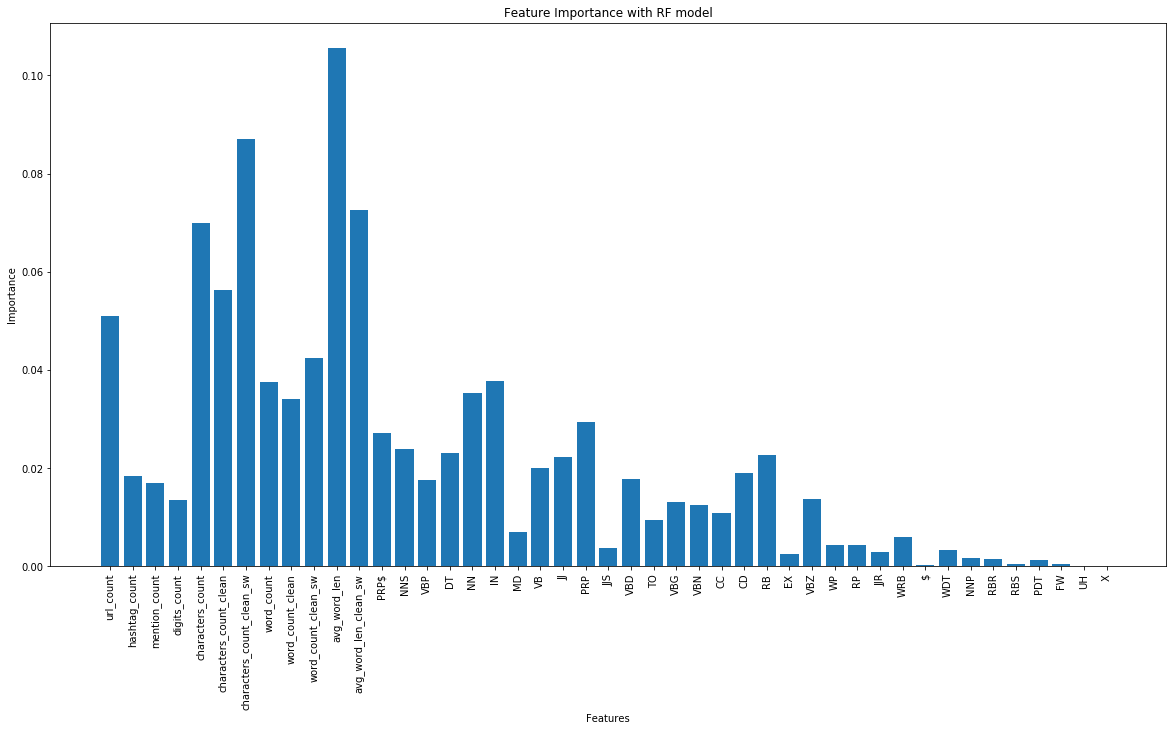

In [110]:
plt.figure(figsize = (20,10))
plt.bar(X_train.columns, rf_final.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance with RF model')
plt.xticks(rotation='vertical')
plt.show()

In [100]:
df = pd.DataFrame()
df['id'] = id
df['target'] = preds
df.to_csv(r'C:\Users\Asus\Desktop\Organizacion_de_datos\TP\sixth_submit.csv', index=False)

###  **Using a random forest model we get a score of approximately 0.663 ~ 0.668**

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 15, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 75, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}